In [1]:
import numpy as np
import matplotlib.pyplot as plt
def machineEpsilon(func=np.float64):
    machine_epsilon = func(1)
    while func(1)+machine_epsilon != func(1):
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

sqeps = np.sqrt(machineEpsilon())

print(np.finfo(float).eps)

2.220446049250313e-16


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# x = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
# y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
# rho = np.array([2.3, 3.5, 4.5, 6.4, 4.4, 3.4, 2.1, 1.6, 1.1])

def truefunc(x, a=0):
    return np.sin(2*np.pi*x)

x = np.linspace(0, 1, 12)
y = truefunc(x)
rho = 1

#add noise
y = y + np.random.normal(0, 0.2, 12)

#starting valuse
a = np.ones(3)

#fitting function breit wigner
def f(x, a):
    return np.polyval(a, x)

#function to calculate the chi2
def chi2(x, y, rho, a):
    return np.sum(((y - f(x, a))/rho)**2)

#beta

def beta(chi2, x, y, a, rho, h=sqeps):
    j = np.zeros(len(a))
    ak = np.zeros(len(a))
    for i in range(len(a)):
        ak[i] = np.sum((y - f(x, a))/rho**2 * (f(x, a+ h*a[i] * np.eye(len(a))[i]) - f(x, a - h*a[i] * np.eye(len(a))[i]))/(2*h*a[i]))
    return ak

# alpha

def alpha(chi2, x, y, a, rho, h=sqeps):
    ap = np.zeros((len(a), len(a)))
    for i in range(len(a)):
        for j in range(len(a)):
            ap[i, j] = np.sum(((f(x, a + h*a[i] * np.eye(len(a))[i]) - f(x, a - h*a[i] * np.eye(len(a))[i]))/(2*h*a[i]) * (f(x, a + h*a[i] * np.eye(len(a))[j]) - f(x, a - h*a[i] * np.eye(len(a))[j]))/(2*h*a[i])/rho**2))
    return ap

#newton step

def newton_step(chi2, x, y, a, rho, h=sqeps):
    anew = a + np.linalg.pinv(alpha(chi2, x, y, a, rho, h)) @ beta(chi2, x, y, a, rho, h)
    return anew

print(alpha(chi2, x, y, a, rho))
print(beta(chi2, x, y, a, rho))


[[ 2.73027801  3.27272729  4.1818182 ]
 [ 3.27272729  4.18181818  5.99999999]
 [ 4.1818182   5.99999999 12.        ]]
[-12.2347482  -15.55571141 -22.40800812]


In [3]:

chilist = []
alist = []
for i in range(3):
    a = newton_step(chi2, x, y, a, rho)
    alist.append(a)
    chilist.append(chi2(x, y, rho, a))

for i in range(100):
    a = newton_step(chi2, x, y, a, rho)
    chilist.append(chi2(x, y, rho, a))
    alist.append(a)
    # if np.abs(chilist[-1] - chilist[-2]) <= np.abs(chilist[-2] * 1e-6):
    #     break

#return minimum chi2
print(min([abs(i) for i in chilist]))


print(alist[[abs(i) for i in chilist].index(min([abs(i) for i in chilist]))])


print(chilist)
print(a)



3.046427668068001
[ 6.51312339e-08 -1.44086775e+00  7.20433853e-01]
[3.046427668068002, 3.081367107498142, 3.0464276680680404, 3.04693032849302, 3.0464276680681137, 3.04642821932506, 3.0464276680903346, 3.0464278164139005, 3.0464276680754456, 3.04642767442098, 3.0464276687114795, 3.0464276696732817, 3.046427694652268, 3.0464276690454692, 3.046427711463349, 3.046427668277918, 3.0464276850157863, 3.046427669761256, 3.0464277132111364, 3.0464276700150563, 3.046427692252676, 3.046427668410422, 3.0464276973399738, 3.046427668068291, 3.046523979637878, 3.0464276680680293, 3.0464993191530434, 3.0464276680680324, 3.0470815927978525, 3.0464276680680284, 3.0505503564197243, 3.046427668068006, 3.0528832817406464, 3.046427668068002, 3.1455340552011153, 3.046427668068004, 3.0472630821481053, 3.0464276680680147, 3.0465697993331915, 3.0464276680680893, 3.0464297105119353, 3.0464276680935374, 3.046428415624784, 3.0464276681189535, 3.046427726060072, 3.0464276682792124, 3.046427679431227, 3.04642766862

step 0
394.3766969765612 7.497920477400258
0.1
step 1
7.497920477400258 2.338131036609946
0.01
step 2
2.338131036609946 1.4684327179745522
0.001
step 3
1.4684327179745522 0.5382090732008202
0.0001
step 4
0.5382090732008202 0.2631064317482077
1e-05
step 5
0.2631064317482077 0.198103367207797
1.0000000000000002e-06
step 6
0.198103367207797 0.13083054376798448
1.0000000000000002e-07
step 7
0.13083054376798448 0.07175222739264338
1.0000000000000002e-08
step 8
0.07175222739264338 0.06167324338853624
1.0000000000000003e-09
step 9
0.06167324338853624 0.06559029315766125
1.0000000000000004e-08
step 10
0.06167324338853624 0.05963585687227815
1.0000000000000003e-09
step 11
0.05963585687227815 0.0700815359125996
1.0000000000000004e-08
step 12
0.05963585687227815 0.06014762233469274
1.0000000000000004e-07
step 13
0.05963585687227815 0.05959360583328423
1.0000000000000004e-08
step 14
0.05959360583328423 0.059510706955078096
1.0000000000000003e-09
step 15
0.059510706955078096 0.059297933969148384
1.

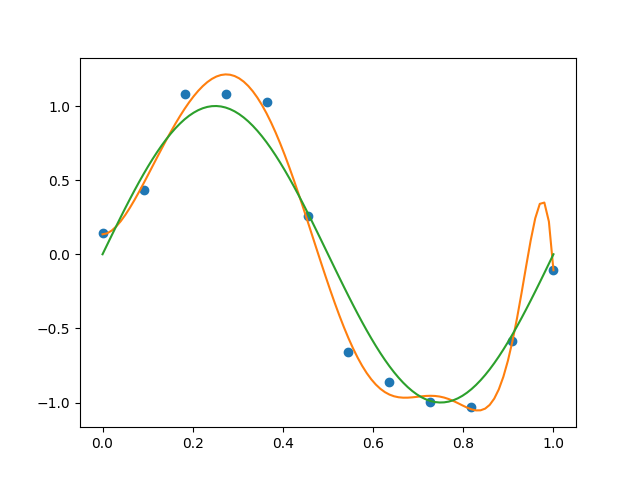

In [10]:
#levenberg step
a = np.ones(15)
alev = []
chilev = []
def ltep(chi2, x, y, a, rho, lam, h=sqeps):
    anew = a + (np.linalg.pinv(alpha(chi2, x, y, a, rho, h) + lam * np.diag(np.diag(alpha(chi2, x, y, a, rho, h)))) @ beta(chi2, x, y, a, rho, h))
    return anew



lam = 1.0


for i in range(100):
    anew = ltep(chi2, x, y, a, rho, lam)
    print(f"step {i}")
    print(chi2(x, y, rho, a), chi2(x, y, rho, anew))
    

    if abs(chi2(x, y, rho, anew)) < abs(chi2(x, y, rho, a)):
        a = anew
        lam = lam/10
        print(lam)
        alev.append(a)
        chilev.append(chi2(x, y, rho, a))
        
    else:
        lam = lam*10
        print(lam)
        if lam > 1e10:
            break

print(min([abs(i) for i in chilev]))
print(alev[[abs(i) for i in chilev].index(min([abs(i) for i in chilev]))])


plt.figure()
plt.plot(x, y, 'o')
plt.plot(np.linspace(min(x), max(x), 100), f(np.linspace(min(x), max(x), 100), a))
plt.plot(np.linspace(min(x), max(x), 100), truefunc(np.linspace(min(x), max(x), 100)))
